# Problem Statement 

The objective of this project is to develop a deep learning-based system capable of recognizing and classifying images of Avengers characters.The task involves learning distinctive facial features from labeled image data and accurately identifying the corresponding character. This problem addresses challenges such as variations in pose, lighting, expressions, and image quality.The goal is to evaluate model performance based on accuracy and generalization to unseen images.


## Link to the dataset : https://www.kaggle.com/datasets/rawatjitesh/avengers-face-recognition/data

In [1]:
# import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# dataset path and parametres
DATASET_PATH = "Cropped_Images_Dataset"   # folder containing 5 subfolders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [3]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

print("Classes:", class_names)
print("Total Classes:", num_classes)


Classes: ['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson']
Total Classes: 5


# Model 1 : Deep CNN

In [5]:
# CNN Model
model1 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])


In [6]:
# compiling the model
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

In [8]:
# train the model
history1 = model1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

Epoch 1/15
8/8 [==============================] - 51s 6s/step - loss: 8.0447 - accuracy: 0.2042 - val_loss: 1.6098 - val_accuracy: 0.2000
Epoch 2/15
8/8 [==============================] - 42s 5s/step - loss: 1.6046 - accuracy: 0.2833 - val_loss: 1.5888 - val_accuracy: 0.2000
Epoch 3/15
8/8 [==============================] - 40s 5s/step - loss: 1.5343 - accuracy: 0.3542 - val_loss: 1.4873 - val_accuracy: 0.4167
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 1.3282 - accuracy: 0.4833 - val_loss: 1.4517 - val_accuracy: 0.4000
Epoch 5/15
8/8 [==============================] - 40s 5s/step - loss: 1.0186 - accuracy: 0.6042 - val_loss: 1.5877 - val_accuracy: 0.5333
Epoch 6/15
8/8 [==============================] - 39s 5s/step - loss: 0.6788 - accuracy: 0.7625 - val_loss: 2.2327 - val_accuracy: 0.5667
Epoch 7/15
8/8 [==============================] - 39s 5s/step - loss: 0.5166 - accuracy: 0.8333 - val_loss: 2.6467 - val_accuracy: 0.4833
Epoch 8/15
8/8 [==================

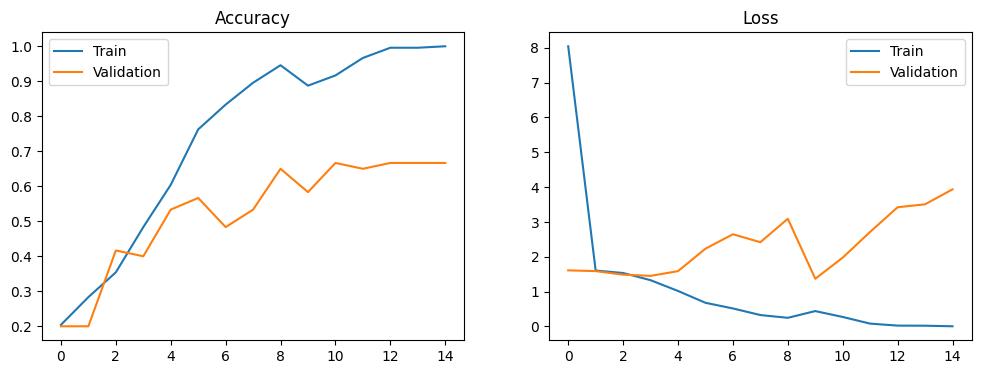

In [14]:
# accuracy and loss plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss")

plt.show()

In [15]:
# evaluate model
val_loss, val_accuracy = model1.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)


2/2 [==============================] - 2s 658ms/step - loss: 3.9363 - accuracy: 0.6667
Validation Accuracy: 0.6666666865348816


2/2 [==============================] - 2s 613ms/step


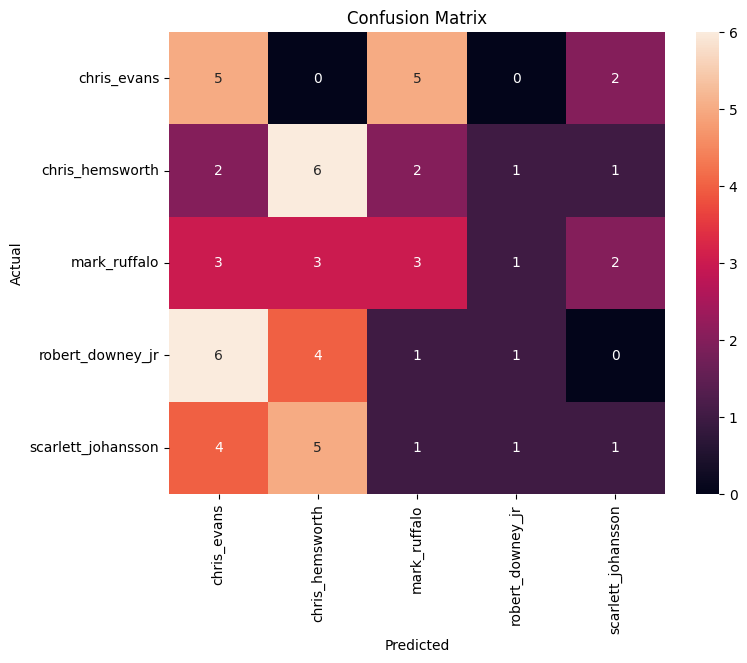

                    precision    recall  f1-score   support

       chris_evans       0.25      0.42      0.31        12
   chris_hemsworth       0.33      0.50      0.40        12
      mark_ruffalo       0.25      0.25      0.25        12
  robert_downey_jr       0.25      0.08      0.12        12
scarlett_johansson       0.17      0.08      0.11        12

          accuracy                           0.27        60
         macro avg       0.25      0.27      0.24        60
      weighted avg       0.25      0.27      0.24        60



In [16]:
# confusion matrix and classification report
y_true = val_generator.classes
y_pred_probs = model1.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [17]:
# Prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model1.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

1/1 [==============================] - 0s 128ms/step


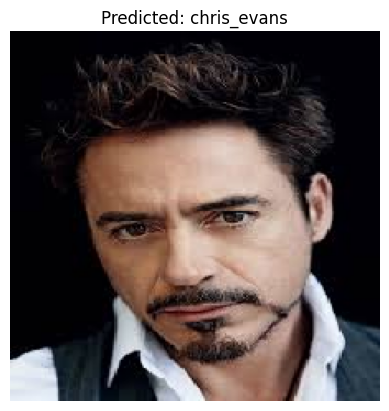

In [18]:
predict_image("C:/Users/pruch/Downloads/images.jpeg")

1/1 [==============================] - 0s 71ms/step


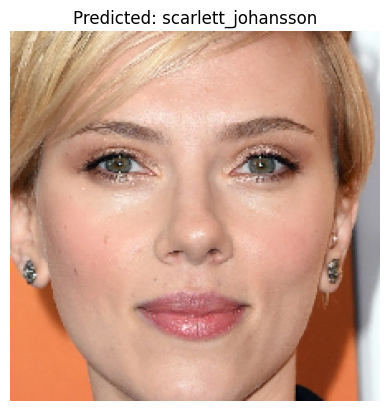

In [19]:
predict_image("D:/Avengers Project Final/Cropped_Images_Dataset/scarlett_johansson/scarlett_johansson49.png")

### Observations:
- The model achieves very high training accuracy, indicating it has sufficient capacity to learn the training data.
- A significant gap between training and validation accuracy is observed, highlighting poor generalization.
- Validation loss increases while training loss continues to decrease, confirming overfitting.
- The model memorizes training samples due to high complexity and absence of regularization techniques.
- Performance on unseen images is inconsistent, making this model unsuitable for real-world deployment.

# Model 2 : Shallow CNN

In [20]:
model2 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])


In [21]:
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
8/8 [==============================] - 5s 626ms/step - loss: 12.4232 - accuracy: 0.1875 - val_loss: 2.9814 - val_accuracy: 0.2500
Epoch 2/10
8/8 [==============================] - 4s 543ms/step - loss: 2.6274 - accuracy: 0.3000 - val_loss: 2.2377 - val_accuracy: 0.2500
Epoch 3/10
8/8 [==============================] - 5s 611ms/step - loss: 1.9452 - accuracy: 0.3708 - val_loss: 2.1190 - val_accuracy: 0.2167
Epoch 4/10
8/8 [==============================] - 4s 546ms/step - loss: 1.4202 - accuracy: 0.4250 - val_loss: 1.5834 - val_accuracy: 0.3667
Epoch 5/10
8/8 [==============================] - 5s 614ms/step - loss: 1.0439 - accuracy: 0.6000 - val_loss: 1.7278 - val_accuracy: 0.3000
Epoch 6/10
8/8 [==============================] - 5s 583ms/step - loss: 0.8264 - accuracy: 0.7708 - val_loss: 1.5663 - val_accuracy: 0.2833
Epoch 7/10
8/8 [==============================] - 5s 571ms/step - loss: 0.6562 - accuracy: 0.7875 - val_loss: 1.5553 - val_accuracy: 0.4333
Epoch 8/10
8/8 [===

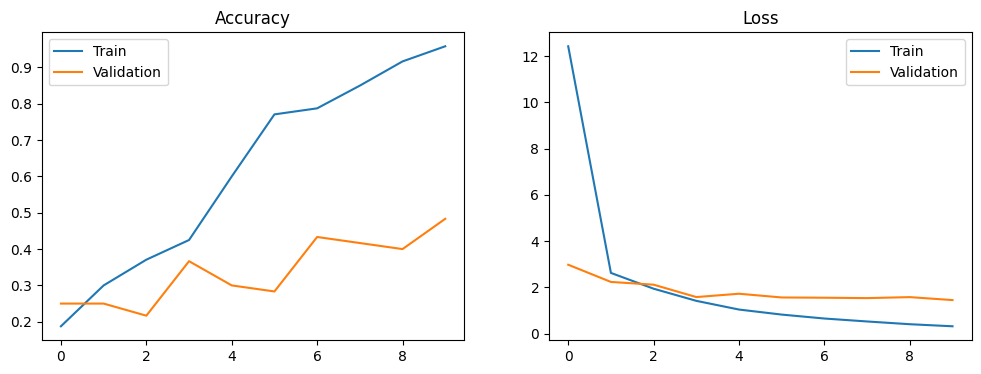

In [23]:
# accuracy and loss plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss")

plt.show()

In [24]:
# evaluate model
val_loss, val_accuracy = model2.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)


2/2 [==============================] - 0s 130ms/step - loss: 1.4534 - accuracy: 0.4833
Validation Accuracy: 0.4833333194255829


2/2 [==============================] - 0s 148ms/step


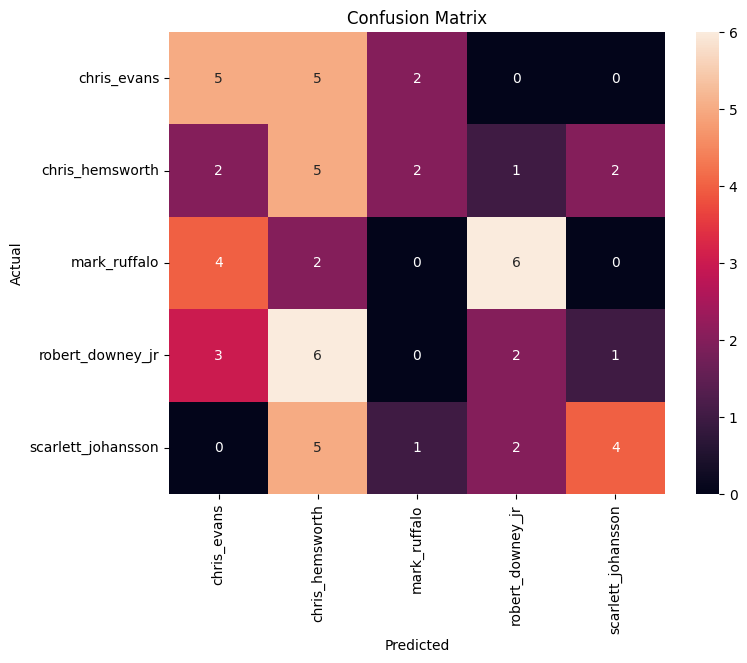

                    precision    recall  f1-score   support

       chris_evans       0.36      0.42      0.38        12
   chris_hemsworth       0.22      0.42      0.29        12
      mark_ruffalo       0.00      0.00      0.00        12
  robert_downey_jr       0.18      0.17      0.17        12
scarlett_johansson       0.57      0.33      0.42        12

          accuracy                           0.27        60
         macro avg       0.27      0.27      0.25        60
      weighted avg       0.27      0.27      0.25        60



In [25]:
# confusion matrix and classification report
y_true = val_generator.classes
y_pred_probs = model2.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [26]:
# Prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model2.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

1/1 [==============================] - 0s 45ms/step


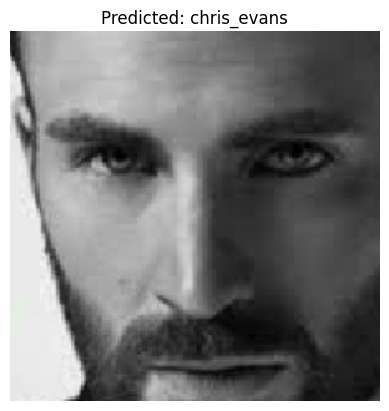

In [27]:
predict_image("D:/Avengers Project Final/Cropped_Images_Dataset/chris_evans/chris_evans50.png")

### Observations:
- Both training and validation accuracies remain low throughout training.
- Loss decreases very slowly and plateaus early, indicating limited learning capacity.
- The shallow architecture fails to capture complex facial features required for image classification.
- The model suffers from high bias, making it ineffective even on training data.
- This model demonstrates that insufficient depth and parameters lead to underfitting.

# Model 3: MobileNetV2 (Transfer Learning)

- Transfer learning significantly improves validation accuracy compared to custom CNNs
- Pretrained MobileNetV2 extracts robust facial features, improving generalization
- Smaller gap between training and validation accuracy indicates reduced overfitting
- Faster convergence due to pretrained weights
- Performs better on unseen images during random prediction testing

In [28]:
# Data augmentation 
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen_aug = train_datagen_aug.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen_aug = train_datagen_aug.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [29]:
# load MbileNetV2 for transfer learning
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False


In [30]:
model3 = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


In [31]:
# model complilation
model3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
# Model training
history3 = model3.fit(
    train_gen_aug,
    validation_data=val_gen_aug,
    epochs=15
)

Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 2.4503 - accuracy: 0.2500 - val_loss: 1.7420 - val_accuracy: 0.2500
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 2.3917 - accuracy: 0.2042 - val_loss: 1.7026 - val_accuracy: 0.2500
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 2.2160 - accuracy: 0.2292 - val_loss: 1.7162 - val_accuracy: 0.2833
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 2.1309 - accuracy: 0.2583 - val_loss: 1.6508 - val_accuracy: 0.2667
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 1.9074 - accuracy: 0.3542 - val_loss: 1.7189 - val_accuracy: 0.3000
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 2.0742 - accuracy: 0.3083 - val_loss: 1.5183 - val_accuracy: 0.4500
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 1.7412 - accuracy: 0.3500 - val_loss: 1.5117 - val_accuracy: 0.4000
Epoch 8/15
8/8 [=======================

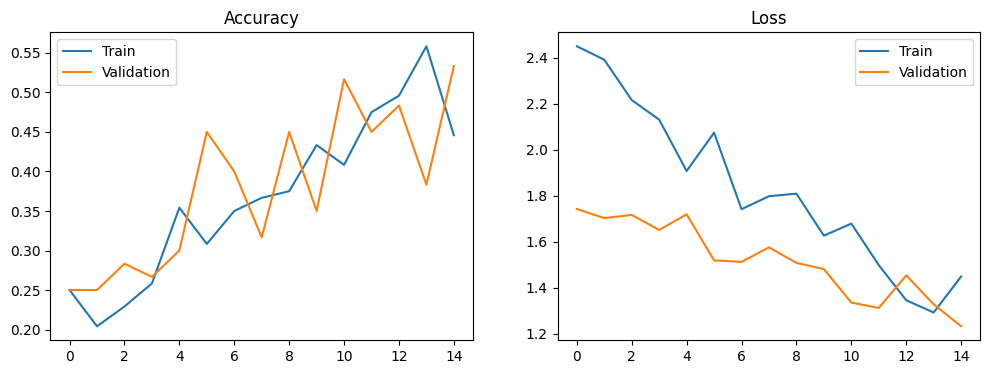

In [33]:
# accuracy and loss plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss")

plt.show()

In [34]:
# evaluate model
val_loss, val_accuracy = model3.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)


2/2 [==============================] - 1s 613ms/step - loss: 1.3528 - accuracy: 0.5333
Validation Accuracy: 0.5333333611488342


2/2 [==============================] - 2s 584ms/step


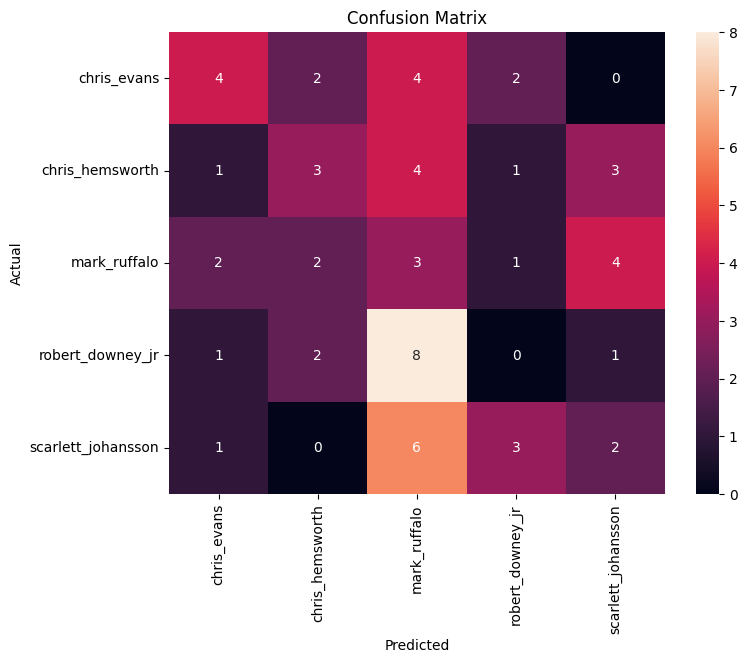

                    precision    recall  f1-score   support

       chris_evans       0.44      0.33      0.38        12
   chris_hemsworth       0.33      0.25      0.29        12
      mark_ruffalo       0.12      0.25      0.16        12
  robert_downey_jr       0.00      0.00      0.00        12
scarlett_johansson       0.20      0.17      0.18        12

          accuracy                           0.20        60
         macro avg       0.22      0.20      0.20        60
      weighted avg       0.22      0.20      0.20        60



In [35]:
# confusion matrix and classification report
y_true = val_generator.classes
y_pred_probs = model3.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [36]:
# Prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model3.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

1/1 [==============================] - 1s 515ms/step


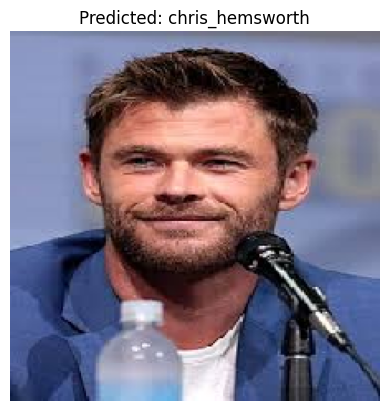

In [37]:
predict_image("C:/Users/pruch/Downloads/images (2).jpeg")

In [38]:
import random
from tensorflow.keras.preprocessing import image

def predict_random_images_with_truth(model, dataset_path, class_indices, num_images=5):
    """
    Randomly selects images and shows real vs predicted labels with confidence.
    """

    idx_to_class = {v: k for k, v in class_indices.items()}
    samples = []

    # Collect image paths with true labels
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                samples.append((os.path.join(class_folder, img_name), class_name))

    # Random sample
    selected_samples = random.sample(samples, num_images)

    plt.figure(figsize=(15, 6))

    for i, (img_path, true_label) in enumerate(selected_samples):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        preds = model.predict(img_array, verbose=0)
        pred_idx = np.argmax(preds)
        pred_label = idx_to_class[pred_idx]

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(
            f"Real: {true_label}\nPred: {pred_label}",
            fontsize=10
        )

    plt.show()


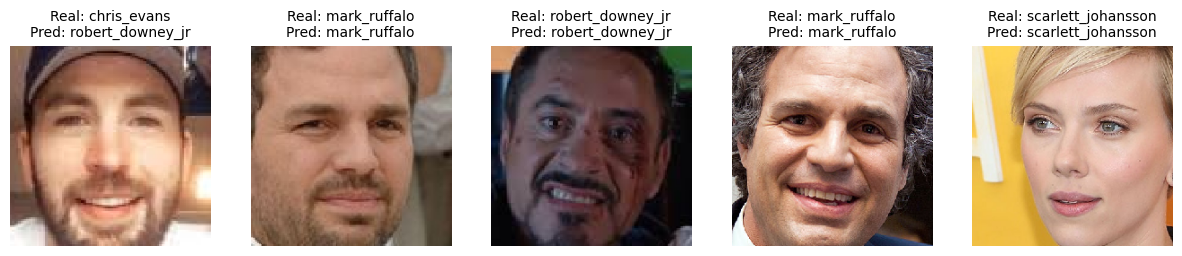

In [39]:
predict_random_images_with_truth(
    model=model3,
    dataset_path=DATASET_PATH,
    class_indices=train_gen_aug.class_indices,
    num_images=5
)


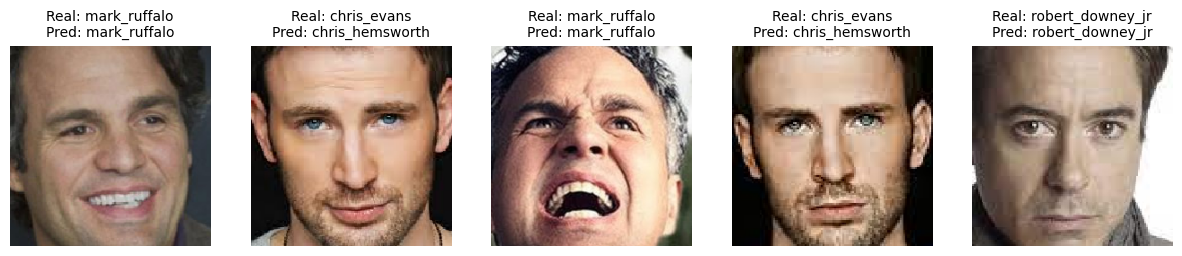

In [40]:
predict_random_images_with_truth(
    model=model3,
    dataset_path=DATASET_PATH,
    class_indices=train_gen_aug.class_indices,
    num_images=5
)


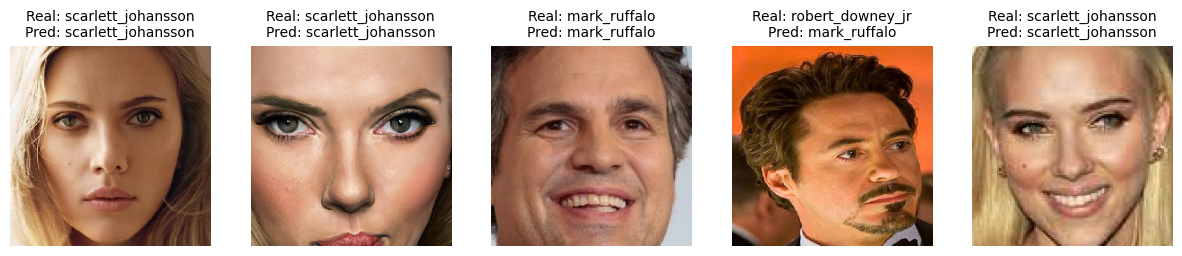

In [41]:
predict_random_images_with_truth(
    model=model3,
    dataset_path=DATASET_PATH,
    class_indices=train_gen_aug.class_indices,
    num_images=5
)


### Observations:
- The MobileNetV2 model achieves significantly higher validation accuracy compared to custom CNN models.
- Pretrained weights enable effective extraction of facial features, improving generalization.
- Training and validation curves show a smaller gap, indicating reduced overfitting.
- Faster convergence is observed due to transfer learning.
- The model performs consistently well on unseen images during random prediction testing.
- MobileNetV2 proves to be the most reliable model for image classification in this project.

# Final Conclusion

Three different deep learning approaches were evaluated for image classification.

- The overfitted CNN demonstrated strong performance on training data but failed to generalize due to excessive model complexity.
- The underfitted CNN lacked sufficient capacity to learn meaningful facial features, resulting in poor performance.
- The MobileNetV2 transfer learning model achieved the best balance between accuracy and generalization.

Based on validation performance, confusion matrix analysis, and predictions on unseen images, MobileNetV2 is selected as the final and most effective model for face recognition.
